# Dimensionality Reduction Using PCA (Principal Component Analysis)
This notebook explores **Principal Component Analysis (PCA)**, an unsupervised learning technique used for dimensionality reduction. We will cover the entire process from inspecting the dataset, visualizing original data, standardizing features, applying PCA, and interpreting the results.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sns.set(style='whitegrid')

## Step 1: Load and Inspect the Dataset

In [3]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['species'] = df['target'].apply(lambda i: target_names[i])
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Dataset Description
- 4 features: Sepal length, Sepal width, Petal length, Petal width
- Target: Iris species (Setosa, Versicolor, Virginica)
- Goal: Reduce dimensionality from 4D to 2D for visualization and analysis


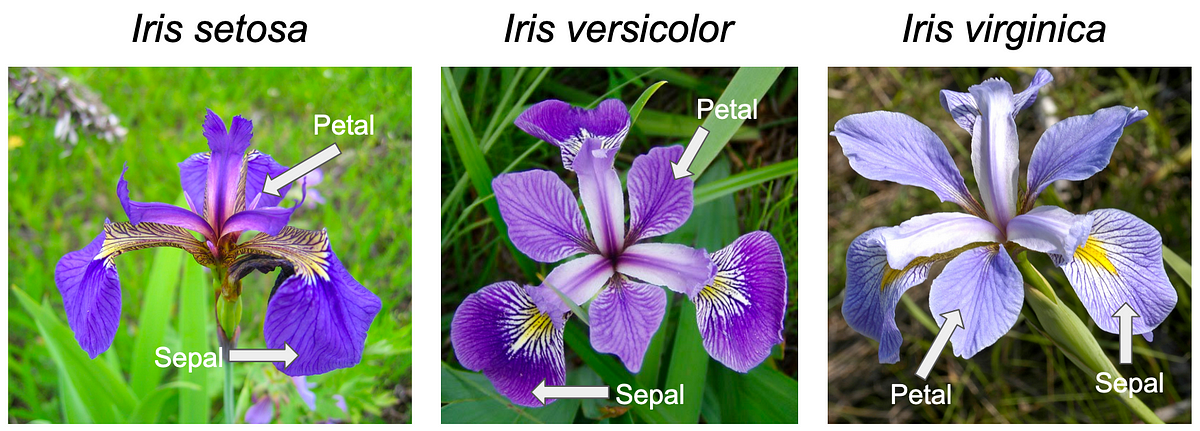
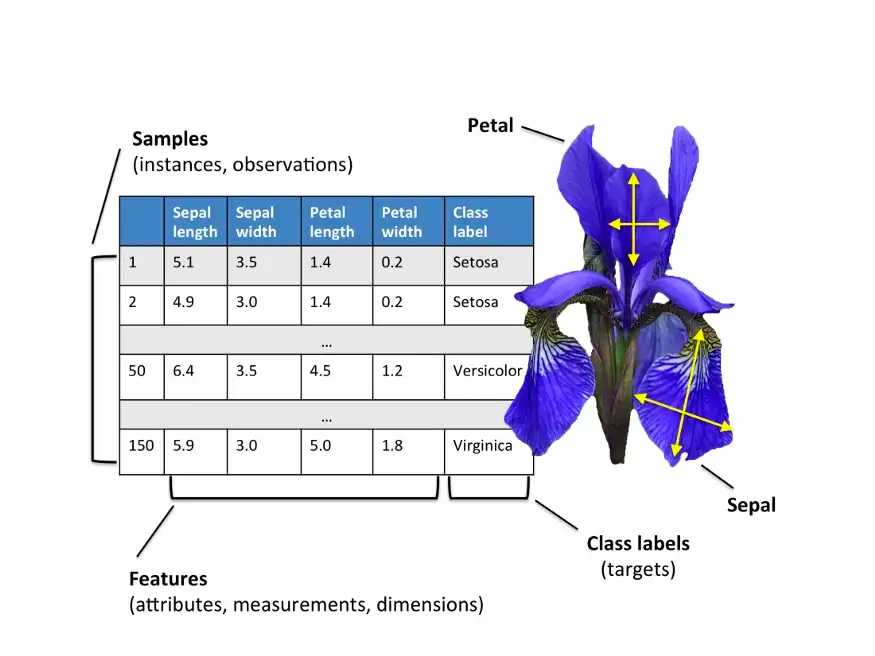

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


## Step 2: Visualize Feature Distributions Before Standardization

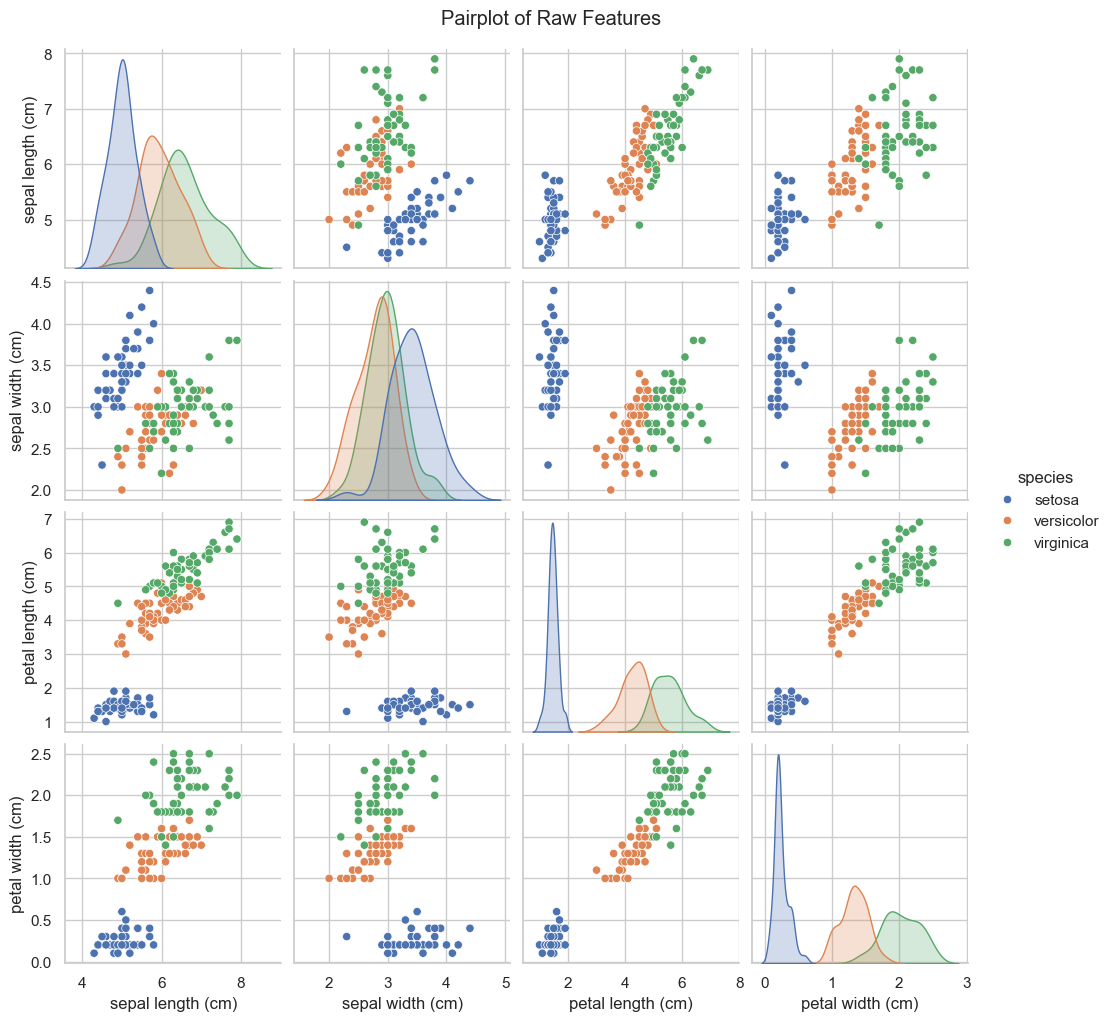

In [5]:
sns.pairplot(df, hue='species', vars=feature_names)
plt.suptitle('Pairplot of Raw Features', y=1.02)
plt.show()

## Interpreting the Pairplot of the Iris Dataset

The pairplot shows **pairwise relationships** between the four numerical features in the Iris dataset:

- `sepal length (cm)`
- `sepal width (cm)`
- `petal length (cm)`
- `petal width (cm)`

Each point is color-coded by species: **Setosa**, **Versicolor**, or **Virginica**.

###  Diagonal Cells
- The diagonal plots display **feature distributions** using KDE or histograms.
- These plots help visualize how each feature is **distributed within each class**.
  - Example: `petal width` has very low values for **Setosa**, distinguishing it clearly from other species.

###  Off-Diagonal Cells
- The off-diagonal plots are **scatterplots** between pairs of features.
- These help identify:
  - **Correlations** between features (e.g., `petal length` and `petal width` show a strong positive correlation).
  - **Separation** between classes. Setosa is clearly distinguishable using `petal width` and `petal length`.

###  Why It Matters
- Pairplots are powerful for **exploring class separability** before applying classification or dimensionality reduction.
- Highly correlated features (e.g., `petal length` and `petal width`) suggest **redundancy**, making this dataset a good candidate for PCA.


## Step 3: Standardize the Features
PCA is sensitive to feature scales. We'll standardize each feature to mean = 0 and std = 1.

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=feature_names)
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,-1.468455e-15,1.00335,-1.870024,-0.900681,-0.052506,0.674501,2.492019
sepal width (cm),150.0,-1.823726e-15,1.00335,-2.433947,-0.592373,-0.131979,0.558611,3.090775
petal length (cm),150.0,-1.610564e-15,1.00335,-1.567576,-1.226552,0.336478,0.762758,1.785832
petal width (cm),150.0,-9.473903e-16,1.00335,-1.447076,-1.183812,0.132510,0.790671,1.712096


## Understanding Standardization

### What is Standardization?

**Standardization** is a feature scaling technique that transforms data such that:

- The **mean becomes 0**
- The **standard deviation becomes 1**

It is also known as **Z-score normalization**. The formula is:

    z = (x - μ) / σ

Where:
- `x` is the original value
- `μ` is the mean of the feature
- `σ` is the standard deviation of the feature

 
---

### Standardization vs. Normalization

| Aspect           | Standardization                                 | Normalization                               |
|------------------|--------------------------------------------------|---------------------------------------------|
| Formula          | z = (x - μ) / σ                                  | x' = (x - min) / (max - min)                |
| Output Range     | Mean = 0, Std = 1                                | Typically scaled to [0, 1] or [-1, 1]       |
| Use Case         | Assumes Gaussian distribution (e.g., PCA, LR)   | Preferred in bounded models like neural nets |

**Memory Tip:** Standardization involves the **standard deviation** — that's your clue.

---

### Interpreting This Output

From the standardized summary:

mean ≈ -1.468e-15, std ≈ 1.00335


- The mean is **very close to 0** — the value `-1.468e-15` is effectively zero, and the small deviation is due to floating-point rounding errors.
- The standard deviation is **approximately 1** (1.00335), as expected.

This confirms that standardization has been applied correctly across all features.

---

### When to Use Standardization

- Use standardization **whenever the model is sensitive to feature scales**.
- Common examples include:
  - **PCA** (as we’re using here)
  - **Logistic regression**
  - **K-means clustering**
  - **SVM**
- It is **especially important** when features have different units (e.g., height in cm, weight in kg).

---

### Reminder

Standardization does **not** squash data into a fixed range. It just shifts and scales data to be centered around 0 with a consistent spread (std = 1). This is essential for algorithms that rely on **distance** or **directional variance**.



## Step 4: Apply PCA to the Scaled Data

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print('Explained Variance Ratio:', pca.explained_variance_ratio_)
print('Total Variance Explained:', np.sum(pca.explained_variance_ratio_))

Explained Variance Ratio: [0.72962445 0.22850762]
Total Variance Explained: 0.9581320720000164


### Interpretation
- Each principal component is a linear combination of original features.
- PC1 captures the most variance, PC2 the second-most.
- These two components together explain most of the structure of the dataset in just 2 dimensions.

## Step 5: Visualize the PCA Results

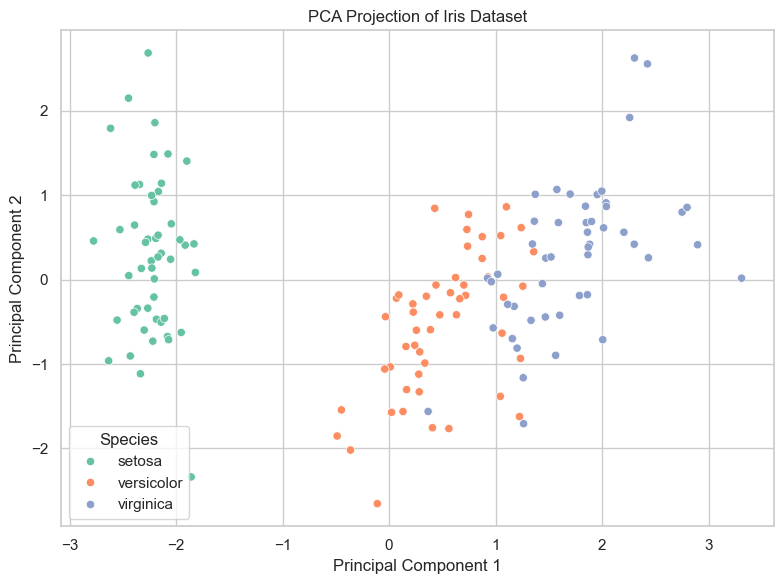

In [9]:
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = df['species']
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species', palette='Set2')
plt.title('PCA Projection of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')
plt.tight_layout()
plt.show()

## Step 6: Summary and Teaching Notes
- PCA is used to reduce high-dimensional datasets while preserving structure.
- Standardization is critical before applying PCA.
- You can use PCA for **visualization**, **noise reduction**, and **speeding up ML models**.
- In this example, we reduced the dataset from 4D to 2D and retained most variance.